In [244]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import datetime

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [245]:
# Donation Types Against Branches
df = pd.read_csv("donation_type1.csv")
e_colomn1 = df.loc[df['Branch_Code'] == 'BRC-01']
e_colomn1

,Branch_Code,Donation_Date,Weekday,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M),Unnamed: 10,Unnamed: 11
0,BRC-01,01/04/2014,Tue,67.0,29.0,6.0,0.0,0.0,0.0,10.0,NaN,NaN
1,BRC-01,01/04/2015,Wed,90.0,24.0,3.0,0.0,0.0,0.0,5.0,NaN,NaN
2,BRC-01,01/04/2016,Fri,42.0,32.0,4.0,0.0,1.0,0.0,2.0,NaN,NaN
3,BRC-01,01/04/2017,Sat,66.0,52.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN
4,BRC-01,01/04/2018,Sun,18.0,22.0,2.0,0.0,0.0,0.0,5.0,NaN,NaN
5,BRC-01,01/08/2013,Thu,78.0,30.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN
6,BRC-01,01/08/2014,Fri,67.0,22.0,2.0,0.0,0.0,0.0,8.0,NaN,NaN
7,BRC-01,01/08/2015,Sat,56.0,29.0,4.0,0.0,0.0,0.0,0.0,NaN,NaN
8,BRC-01,01/08/2016,Mon,53.0,42.0,14.0,0.0,0.0,0.0,12.0,NaN,NaN
9,BRC-01,01/08/2017,Tue,68.0,18.0,1.0,0.0,0.0,0.0,29.0,NaN,NaN


In [246]:
e_colomn1['Donation_Date'].min()

'01/01/2014'

In [247]:
e_colomn1['Donation_Date'].max()

'31/12/2017'

## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate values by date and so on.

In [248]:
cols = ['Weekday','Unnamed: 10', 'Unnamed: 11']
e_colomn1.drop(cols, axis=1, inplace=True)
e_colomn1 = e_colomn1.sort_values('Donation_Date')
e_colomn1

,Branch_Code,Donation_Date,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M)
20,BRC-01,01/01/2014,63.0,38.0,3.0,0.0,0.0,0.0,13.0
21,BRC-01,01/01/2015,39.0,30.0,3.0,0.0,0.0,0.0,5.0
22,BRC-01,01/01/2016,58.0,30.0,2.0,0.0,0.0,0.0,7.0
23,BRC-01,01/01/2017,42.0,19.0,0.0,0.0,0.0,0.0,8.0
24,BRC-01,01/01/2018,56.0,30.0,0.0,0.0,0.0,0.0,9.0
15,BRC-01,01/02/2014,64.0,32.0,0.0,0.0,0.0,0.0,15.0
16,BRC-01,01/02/2015,53.0,24.0,27.0,0.0,0.0,0.0,0.0
17,BRC-01,01/02/2016,44.0,26.0,1.0,0.0,0.0,0.0,14.0
18,BRC-01,01/02/2017,51.0,38.0,1.0,0.0,0.0,0.0,7.0
19,BRC-01,01/02/2018,45.0,22.0,5.0,0.0,0.0,0.0,5.0


In [249]:
e_colomn1.isnull().sum()

Branch_Code      0
Donation_Date    0
Sum(R)           0
Sum(T)           0
Sum(P)           0
Sum(A)           0
Sum(N)           0
Sum(C)           0
Sum(M)           0
dtype: int64

In [250]:
e_colomn1 = e_colomn1.groupby('Donation_Date')['Sum(R)','Sum(T)','Sum(P)','Sum(A)','Sum(N)','Sum(C)','Sum(M)'].sum().reset_index()
e_colomn1.head()

,Donation_Date,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M)
0,01/01/2014,63.0,38.0,3.0,0.0,0.0,0.0,13.0
1,01/01/2015,39.0,30.0,3.0,0.0,0.0,0.0,5.0
2,01/01/2016,58.0,30.0,2.0,0.0,0.0,0.0,7.0
3,01/01/2017,42.0,19.0,0.0,0.0,0.0,0.0,8.0
4,01/01/2018,56.0,30.0,0.0,0.0,0.0,0.0,9.0


## Indexing with time series data

In [251]:
e_colomn1 = e_colomn1.set_index('Donation_Date')
e_colomn1.index

Index(['01/01/2014', '01/01/2015', '01/01/2016', '01/01/2017', '01/01/2018',
       '01/02/2014', '01/02/2015', '01/02/2016', '01/02/2017', '01/02/2018',
       ...
       '31/10/2013', '31/10/2014', '31/10/2015', '31/10/2016', '31/10/2017',
       '31/12/2013', '31/12/2014', '31/12/2015', '31/12/2016', '31/12/2017'],
      dtype='object', name='Donation_Date', length=1831)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily frequency value for that month instead, and we are using the start of each month as the timestamp.

In [255]:
cols1 = ['Sum(R)','Sum(T)','Sum(P)','Sum(A)','Sum(N)','Sum(C)','Sum(M)']
y = e_colomn1[cols1]
y

,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M)
Donation_Date,,,,,,,
01/01/2014,63.0,38.0,3.0,0.0,0.0,0.0,13.0
01/01/2015,39.0,30.0,3.0,0.0,0.0,0.0,5.0
01/01/2016,58.0,30.0,2.0,0.0,0.0,0.0,7.0
01/01/2017,42.0,19.0,0.0,0.0,0.0,0.0,8.0
01/01/2018,56.0,30.0,0.0,0.0,0.0,0.0,9.0
01/02/2014,64.0,32.0,0.0,0.0,0.0,0.0,15.0
01/02/2015,53.0,24.0,27.0,0.0,0.0,0.0,0.0
01/02/2016,44.0,26.0,1.0,0.0,0.0,0.0,14.0
01/02/2017,51.0,38.0,1.0,0.0,0.0,0.0,7.0


In [256]:
y

,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M)
Donation_Date,,,,,,,
01/01/2014,63.0,38.0,3.0,0.0,0.0,0.0,13.0
01/01/2015,39.0,30.0,3.0,0.0,0.0,0.0,5.0
01/01/2016,58.0,30.0,2.0,0.0,0.0,0.0,7.0
01/01/2017,42.0,19.0,0.0,0.0,0.0,0.0,8.0
01/01/2018,56.0,30.0,0.0,0.0,0.0,0.0,9.0
01/02/2014,64.0,32.0,0.0,0.0,0.0,0.0,15.0
01/02/2015,53.0,24.0,27.0,0.0,0.0,0.0,0.0
01/02/2016,44.0,26.0,1.0,0.0,0.0,0.0,14.0
01/02/2017,51.0,38.0,1.0,0.0,0.0,0.0,7.0


Have a quick peek 2017 sales data.

In [242]:
y['2017':]

,Sum(R),Sum(T),Sum(P),Sum(A),Sum(N),Sum(C),Sum(M)
Donation_Date,,,,,,,
21/01/2014,94.0,35.0,2.0,1.0,0.0,0.0,10.0
21/01/2015,75.0,27.0,4.0,0.0,0.0,0.0,12.0
21/01/2016,66.0,24.0,2.0,0.0,0.0,0.0,6.0
21/01/2017,20.0,17.0,1.0,0.0,0.0,0.0,4.0
21/01/2018,32.0,27.0,4.0,0.0,0.0,0.0,5.0
21/02/2014,56.0,61.0,9.0,0.0,0.0,0.0,0.0
21/02/2015,46.0,29.0,8.0,0.0,0.0,0.0,3.0
21/02/2016,42.0,27.0,4.0,0.0,0.0,0.0,2.0
21/02/2017,41.0,47.0,3.0,0.0,0.0,0.0,9.0


## Visualizing Donation Type on branch level time series data

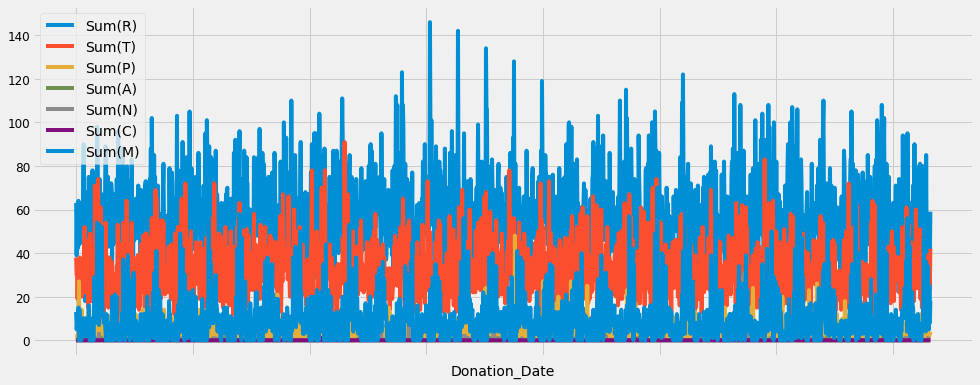

In [221]:
y.plot(figsize=(15, 6))
plt.show()

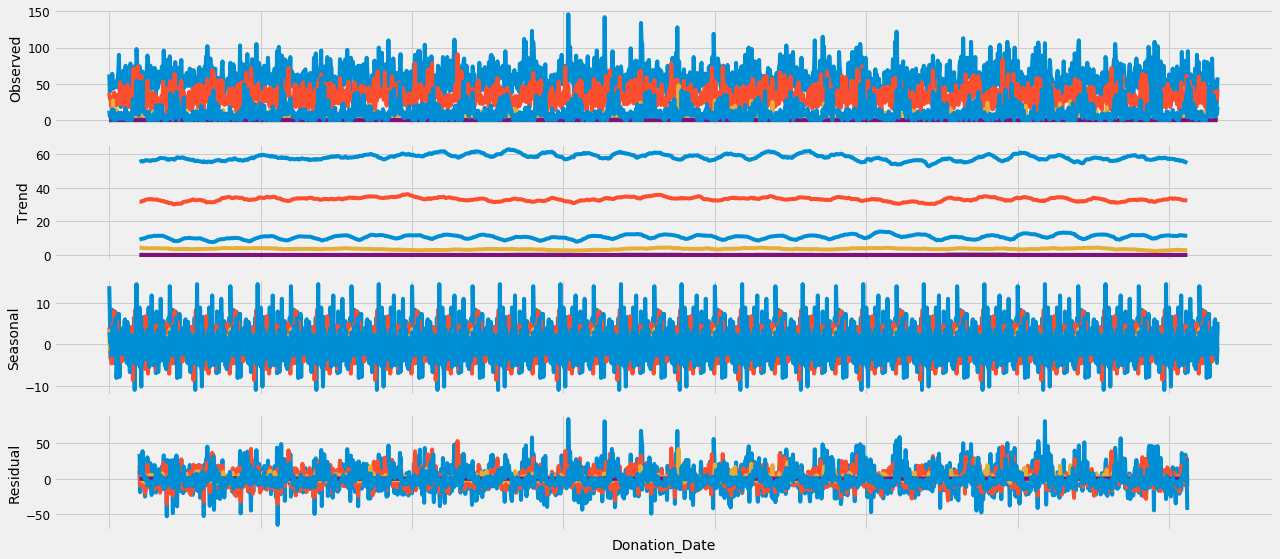

In [222]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
# Start point Forcasting
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=100)
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [223]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [224]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [225]:
y = y.values.ravel('F')

In [226]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0774      0.006    -13.026      0.000      -0.089      -0.066
ma.L1         -0.8319      0.003   -238.960      0.000      -0.839      -0.825
ar.S.L12      -0.4534      0.004   -103.653      0.000      -0.462      -0.445
sigma2       140.3260      0.832    168.560      0.000     138.694     141.958


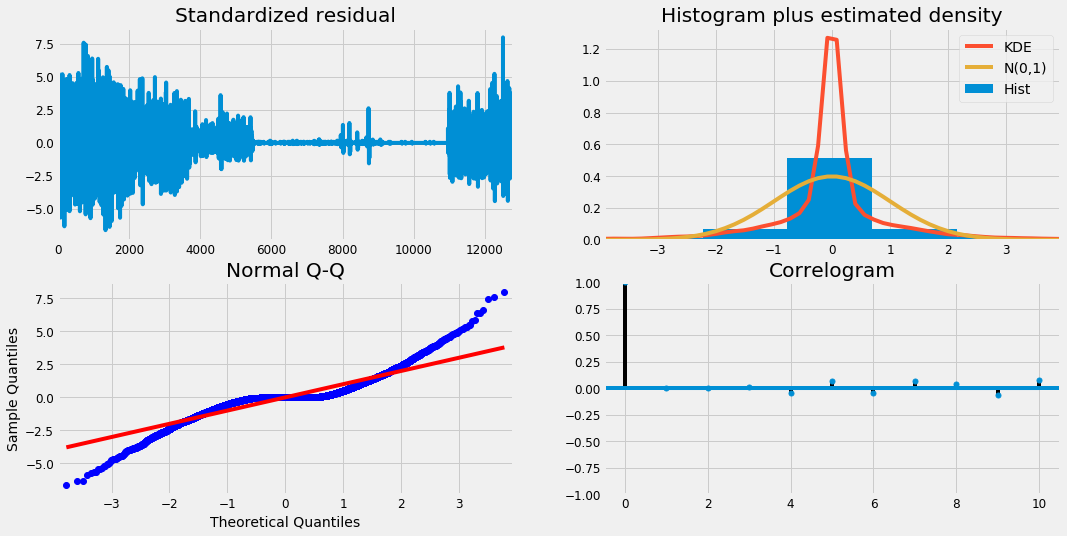

In [227]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()